In [1]:
from __future__ import division
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
#mport seaborn as sns
#sns.set()
pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 5
# d = pd.read_csv('...', parse_dates=['date'])
# pd.to_datetime(d['timestamp'], unit='s')
# with mpl.rc_context({"figure.figsize": (5, 5)}):
# with mpl.rc_context({"lines.linewidth": 2, "lines.color": "r"}):
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax.set_xlabel('x label')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skyfield import api
load = api.Loader('../data')
ts = load.timescale(builtin=True)
t = ts.utc(2020, 4, 23)
eph = load('de421.bsp')
sun = eph['sun']
earth = eph['earth']
bluffton = earth + api.Topos('40.8939 N', '83.8917 W')
sat = api.EarthSatellite(
    '1 25544U 98067A   20114.53491251  .00001443  00000-0  33988-4 0  9995',
    '2 25544  51.6434 258.9578 0001655 179.6828 273.6120 15.49306451223542',
)

In [3]:
from skyfield.data import mpc

with load.open(mpc.COMET_URL) as f:
    comets = mpc.load_comets_dataframe(f)

comets = comets.set_index('designation', drop=False)
print(len(comets), 'comets loaded')

916 comets loaded


In [4]:
row = comets.loc['C/2020 F3 (NEOWISE)']

In [5]:
from skyfield.constants import GM_SUN_Pitjeva_2005_km3_s2 as GM_SUN

ts = load.timescale(builtin=True)
eph = load('de421.bsp')
sun, earth = eph['sun'], eph['earth']

comet = sun + mpc.comet_orbit(row, ts, GM_SUN)

t = ts.utc(2020, 7, 22)
comet_pos = earth.at(t).observe(comet)
ra, dec, distance = comet_pos.radec()
print(ra)
print(dec)

10h 06m 39.38s
+46deg 02' 01.9"


In [6]:
from skyfield.data import hipparcos

In [7]:
with load.open(hipparcos.URL) as f:
    stars = hipparcos.load_dataframe(f)

In [8]:
len(stars)

118218

In [9]:
#bright = stars[stars.magnitude <= 7]
bright = stars[stars.magnitude <= 6]

In [10]:
len(bright)

5044

In [11]:
from skyfield.projections import build_stereographic_projection

In [12]:
proj = build_stereographic_projection(comet_pos)

In [13]:
from skyfield.api import Star

In [14]:
all_stars = Star.from_dataframe(stars)

In [15]:
all_star_positions = earth.at(t).observe(all_stars)
all_star_x, all_star_y = proj(all_star_positions)

In [16]:
#print(all_star_coordinates)

In [17]:
starobj = Star.from_dataframe(bright)

In [18]:
bluffton = earth + api.Topos('40.8939 N', '83.8917 W')

In [19]:
observer = bluffton.at(t)

In [20]:
starpos = observer.observe(starobj)

In [21]:
x, y = proj(starpos)

In [22]:
points = [(0.5, 32), (1.0, 30), (1.5, 28), (2.0, 27), (2.5, 24), (3.0, 22), (3.5, 20),
          (4.0, 19), (4.5, 17),
          (5.0, 16), (5.5, 14), (6.0, 11), (6.5, 10), (7.0, 9), (7.5, 8), (8.0, 7), (8.5, 6),
          (9.0, 5), (9.5, 4)]
mag, size = np.array(points).T

In [23]:
a, b, c = np.polyfit(mag, size, 2)
print(a, b, c)

0.14536340852130386 -4.636090225563916 34.719298245614056


In [24]:
#plot(mag, size, 'o')
#X = np.arange(0, 10)
#plot(a*X*X + b*X + c)

In [25]:
def star_markersize(magnitude):
    return np.clip(6.0 - magnitude, 0.5, None) ** 2.0

In [26]:
print(dir(starobj))
star_markersize(bright.magnitude)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_compute_vectors', '_observe_from_bcrs', '_position_au', '_velocity_au_per_d', 'au_km', 'dec', 'dec_mas_per_year', 'epoch', 'from_dataframe', 'names', 'parallax_mas', 'ra', 'ra_mas_per_year', 'radial_km_per_s', 'target']


hip
88        0.2500
107       0.2500
122       1.4884
124       0.2500
145       0.7569
           ...  
118243    1.2544
118268    3.8809
118277    0.2500
118281    0.2500
118322    2.2801
Name: magnitude, Length: 5044, dtype: float64

In [27]:
t_comet = ts.utc(2020, 7, range(17, 27))
comet_x, comet_y = proj(earth.at(t_comet).observe(comet))
print(comet_x, comet_y)

[ 0.15500351  0.12487192  0.09415085  0.06298742  0.03154536  0.
 -0.03146817 -0.06268067 -0.09346815 -0.12367671] [ 4.36914984e-02  3.62581155e-02  2.80757650e-02  1.92390628e-02
  9.84665625e-03  2.77555756e-17 -1.01985406e-02 -2.06480548e-02
 -3.12516353e-02 -4.19187999e-02]


In [28]:
constellations = []
path = '/home/brandon/stellarium/skycultures/almagest/constellationship.fab'
path = '/home/brandon/stellarium/skycultures/western/constellationship.fab'
path = '/home/brandon/stellarium/skycultures/western_SnT/constellationship.fab'
with open(path) as f:
    for line in f:
        if line.lstrip().startswith('#'):
            continue
        fields = line.split()
        if not fields:
            continue
        name = fields[0]
        edges = [(int(fields[i]), int(fields[i+1]))
                 for i in range(2, len(fields), 2)]
        constellations.append(edges)

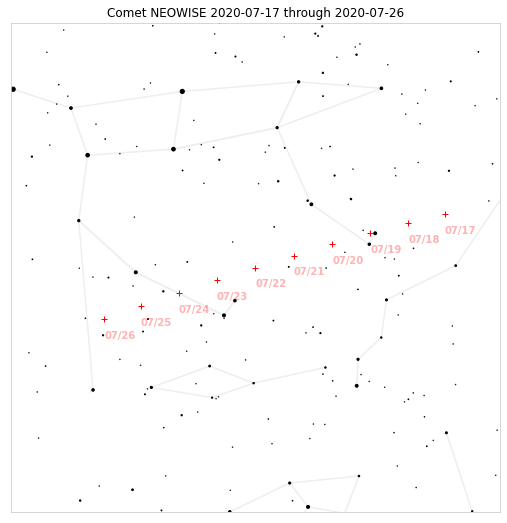

In [29]:
fig, ax = plt.subplots(figsize=[9, 9])
for edges in constellations:
    for starnum1, starnum2 in edges:
        i = stars.index.get_loc(starnum1)
        x1 = all_star_x[i]
        y1 = all_star_y[i]
        i = stars.index.get_loc(starnum2)
        x2 = all_star_x[i]
        y2 = all_star_y[i]
        ax.plot((x1, x2), (y1, y2), '#eee', zorder=0)
ax.scatter(x, y, s=star_markersize(bright.magnitude), color='k')
#ax.scatter(comet_x, comet_y, s=100, color='b')
comet_color = '#f00'
ax.plot(comet_x, comet_y, '+', c=comet_color, zorder=3)
for xi, yi, tstr in zip(comet_x, comet_y, t_comet.utc_strftime('\n%m/%d')):
    text = ax.text(xi, yi, tstr, color=comet_color, ha='left', va='top', fontsize=10,
           weight='bold')
    text.set_alpha(0.3)
ax.set_title('Comet NEOWISE {} through {}'.format(
    *t_comet[[0,-1]].utc_strftime('%Y-%m-%d')
))
ax.set_aspect(1.0)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
K = 0.2
ax.set_xlim(-K, K)
ax.set_ylim(-K, K)
for spine in ax.spines.values():
#    spine.set_visible(False)
    spine.set_edgecolor('#ccc')

In [30]:
len(x)

5044

In [31]:
dir(observer.observer_data)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 'altaz_rotation',
 'bcrs_position',
 'bcrs_velocity',
 'elevation_m',
 'ephemeris',
 'gcrs_position']